# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


In [266]:
countries = pd.read_csv("countries.csv", decimal=',')

In [267]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [270]:
# Sua análise começa aqui.
countries['Country'] = countries['Country'].apply(lambda x: x.strip())
countries['Region'] = countries['Region'].apply(lambda x: x.strip())


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [272]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return list(countries['Region'].sort_values().unique())


q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [273]:
def q2():
    # Retorne aqui o resultado da questão 2.
    pop_density = countries.Pop_density.values
    kbd = KBinsDiscretizer(n_bins=10, encode='ordinal')
    kbd.fit(pop_density.reshape(-1, 1))

    return int((pop_density > kbd.bin_edges_[0][-2]).sum())


q2()


23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [319]:
def q3():
    # Retorne aqui o resultado da questão 3.
    regions = countries.Region.unique()
    climates = countries.Climate.unique()
    return len(regions) + len(climates)

q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [ ]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]


Referência: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html




In [281]:
def q4():
    scaler = StandardScaler()
    imputer = SimpleImputer(strategy='median')
    selected = countries.select_dtypes(np.number)
    pipeline = make_pipeline(imputer, scaler)
    pipeline.fit(selected)

    transformed = pipeline.transform([test_country[2:]]) #exclui as variáveis string
    arable_index = selected.columns.to_list().index("Arable")

    return  float( transformed[0][arable_index].round(3))





-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

(24, 26, False)

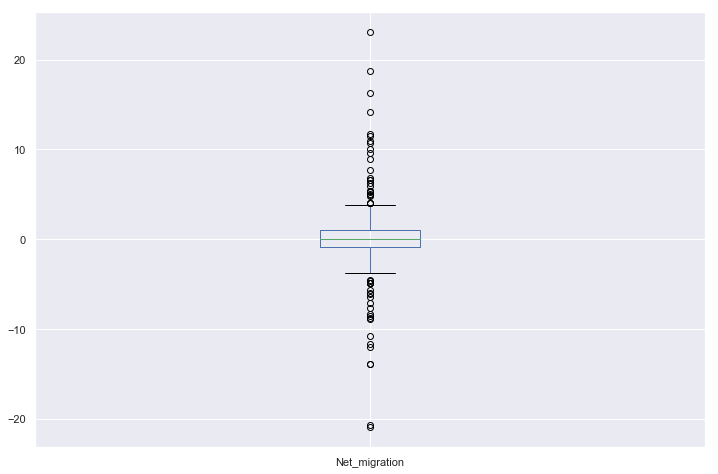

In [380]:
def q5():

    net_migration = countries.Net_migration
    q1 = net_migration.quantile(.25)
    q3 = net_migration.quantile(.75)
    iqr = q3 - q1

    no_outliers = [q1 - 1.5 * iqr, q3 + 1.5 * iqr]

    pd.DataFrame(net_migration).boxplot()


    return (net_migration[net_migration < no_outliers[0]].count(),
            net_migration[net_migration > no_outliers[1]].count(), False)





## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [358]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)


In [373]:

def q6():
    cv =  CountVectorizer()
    X = cv.fit_transform(newsgroup.data)

    # return X[:, cv.vocabulary_['phone']].sum()
    return X[:, cv.vocabulary_['phone']].sum()


## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [378]:
def q7():
    tfidfv = TfidfVectorizer()
    tfidfv.fit(newsgroup.data)
    ng_tfidfv = tfidfv.transform(newsgroup.data)
    return round(ng_tfidfv[:, tfidfv.vocabulary_['phone']].sum(),3)



8.888